# Lasso Regression

- Lasso Regression is a type of linear regression that improves model performance by removing unimportant features.
- It adds a penalty to the model for using too many features.
- This penalty can shrink the effect of some features to exactly zero, effectively removing them from the model.
- It helps prevent overfitting by simplifying the model.
- Lasso is useful for feature selection, making models easier to interpret and faster to run.
- **In short:**  
  `Lasso Regression = Linear Regression + Automatic Feature Elimination`

## Example:

Suppose we are trying to predict a student's exam score based on:

- Hours studied  
- Hours of sleep  
- Number of snacks eaten  
- Favorite color  
- Phone brand used  

A normal linear regression might include all these features. But clearly, some of them (like favorite color or phone brand) are not helpful.

**Lasso Regression** will assign zero weight to these unimportant features (like favorite color), effectively removing them from the model.  
This leaves us with only the most relevant predictors: hours studied and hours of sleep.

As a result, the model becomes simpler and more accurate.


# Importing data and dependencies

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Data collection and Processing (Data Eyeballing) (Checking how the data looks like)

In [210]:
df=pd.read_csv("dataset.csv")

In [211]:
df.shape

(4340, 8)

In [212]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [213]:
df.sample(6)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2006,Maruti Alto LXi,2008,95000,70000,Petrol,Individual,Manual,First Owner
1639,Maruti Wagon R VXI BS IV,2017,350000,30000,Petrol,Individual,Manual,First Owner
338,Maruti Swift Dzire VDI,2015,490000,60000,Diesel,Individual,Manual,Second Owner
951,Maruti Swift DDiS LDI,2016,550000,54000,Diesel,Dealer,Manual,First Owner
2007,Maruti S-Cross Zeta DDiS 200 SH,2018,850000,50000,Diesel,Individual,Manual,First Owner
1928,Fiat Punto 1.2 Active,2010,80000,50000,Petrol,Individual,Manual,Second Owner


In [214]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [215]:
df.duplicated().sum()

np.int64(763)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [217]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [218]:
number_df=df.select_dtypes(include='number')
number_df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


<Axes: >

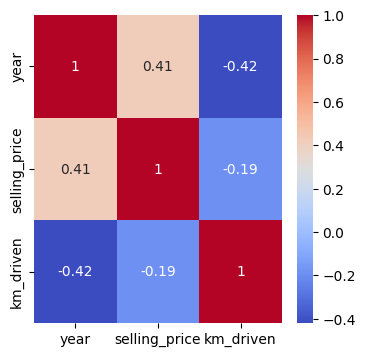

In [219]:
plt.figure(figsize=(4,4))
sns.heatmap(number_df.corr(),annot=True,cmap='coolwarm')


In [220]:
# checking the distribution of categorical data
print(df.fuel.value_counts())
print("\n")
print(df.transmission.value_counts())
print("\n")
print(df.seller_type.value_counts())
print("\n")
print(df.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


#### Encoding the Categorical Data 

In [221]:
# encoding "fuel" Column
df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
df.sample(8)

C:\Users\nisch\AppData\Local\Temp\ipykernel_52508\950101684.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3503,Maruti 800 AC,2002,80000,40000,1,Individual,Manual,Fourth & Above Owner
2109,Mahindra Bolero 2011-2019 SLX,2013,400000,107000,0,Individual,Manual,First Owner
1220,Maruti Alto 800 LXI,2012,200000,90000,1,Individual,Manual,Third Owner
4207,Hyundai EON Era Plus,2013,170000,80000,1,Individual,Manual,Third Owner
3687,Nissan Sunny XL,2016,600000,19495,1,Dealer,Manual,First Owner
2287,Hyundai Santro Xing XG,2005,70000,68500,1,Dealer,Manual,First Owner
3722,Ford Freestyle Titanium Plus Diesel BSIV,2019,525000,16000,0,Individual,Manual,First Owner
1707,Mahindra Quanto C6,2013,300000,60000,0,Individual,Manual,First Owner


In [222]:
# encoding "seller_type" Column
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)
df.sample(8)

C:\Users\nisch\AppData\Local\Temp\ipykernel_52508\368363633.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3766,Tata New Safari DICOR 2.2 GX 4x2 BS IV,2012,450000,97000,0,0,Manual,Second Owner
4270,Maruti SX4 ZDI,2011,350000,105000,0,1,Manual,First Owner
4018,Renault Scala Diesel RxL,2013,550000,38500,0,0,Manual,First Owner
2624,Ford Aspire Titanium BSIV,2017,430000,101159,1,1,Manual,First Owner
3598,Maruti Baleno Alpha 1.3,2017,800000,90000,0,0,Manual,First Owner
3779,Ford Figo 1.2P Titanium MT,2019,600000,25000,1,0,Manual,First Owner
2663,Hyundai Getz GLS,2005,250000,70000,1,0,Manual,First Owner
3668,Chevrolet Enjoy TCDi LT 8 Seater,2015,500000,50000,0,0,Manual,First Owner


In [223]:
# encoding "transmission" Column
df.replace({'transmission':{'Automatic':0,'Manual':1}},inplace=True)
df.sample(8)

C:\Users\nisch\AppData\Local\Temp\ipykernel_52508\3932697312.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'transmission':{'Automatic':0,'Manual':1}},inplace=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2186,Maruti Baleno Alpha 1.3,2016,770000,64672,0,2,1,First Owner
3383,Datsun GO T BSIV,2014,250000,58000,1,0,1,First Owner
2770,Nissan Terrano XL 85 PS,2016,525000,105000,0,0,1,Second Owner
3968,Honda City S,2013,450000,96987,1,1,1,First Owner
1816,Mahindra Scorpio S4 4WD,2014,700000,70000,0,0,1,Second Owner
2707,Maruti Alto LXi,2011,135000,78000,1,0,1,First Owner
4071,Maruti Ertiga ZDI,2013,640000,89000,0,1,1,First Owner
955,Hyundai Getz GLE,2007,110000,60000,1,0,1,Fourth & Above Owner


In [224]:
# encoding "owner" Column
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
df.sample(8)

C:\Users\nisch\AppData\Local\Temp\ipykernel_52508\665490135.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
781,Maruti Celerio VXI AT,2017,450000,50000,1,0,0,0
1147,Maruti Alto 800 LXI,2018,285000,30000,1,1,1,0
372,Maruti 800 AC,2000,60000,40000,1,0,1,2
2225,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2018,930000,20000,0,0,1,0
518,Honda Amaze EX i-Dtech,2013,325000,65000,0,1,1,0
268,Hyundai i20 1.4 Magna ABS,2009,180000,60000,0,0,1,1
1930,Hyundai EON Era Plus,2013,250000,35000,1,0,1,0
64,Tata Indica DLS,2005,70000,80000,0,0,1,0


In [225]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,1,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,1,1


# EDA


<Axes: >

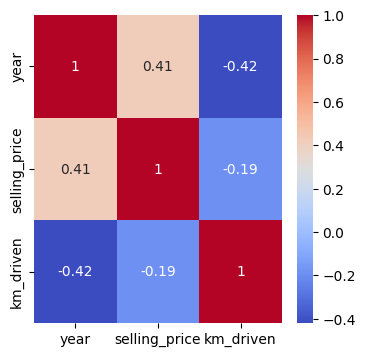

In [226]:
plt.figure(figsize=(4,4))
sns.heatmap(number_df.corr(), annot=True, cmap='coolwarm')

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'selling_price'}>,
        <Axes: title={'center': 'km_driven'}>],
       [<Axes: title={'center': 'fuel'}>,
        <Axes: title={'center': 'seller_type'}>,
        <Axes: title={'center': 'transmission'}>],
       [<Axes: title={'center': 'owner'}>, <Axes: >, <Axes: >]],
      dtype=object)

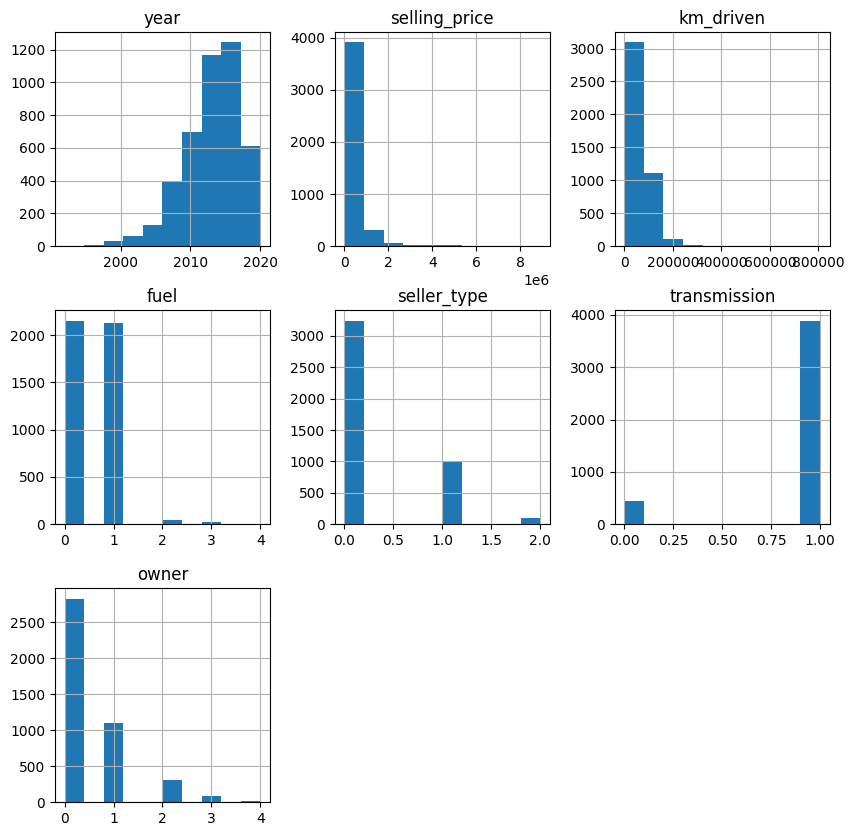

In [227]:
df.hist(figsize=(10,10))

# Splitting data into predictors and Target

In [228]:
X=df.drop(['name','selling_price'],axis=1)
y=df['selling_price']

In [229]:
X

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,1,0,1,0
1,2007,50000,1,0,1,0
2,2012,100000,0,0,1,0
3,2017,46000,1,0,1,0
4,2014,141000,0,0,1,1
...,...,...,...,...,...,...
4335,2014,80000,0,0,1,1
4336,2014,80000,0,0,1,1
4337,2009,83000,1,0,1,1
4338,2016,90000,0,0,1,0


In [230]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

# Splitting Training and Testing Data

In [231]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [232]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3472, 6) (868, 6) (3472,) (868,)


# Analysing and Eyeballing Training Data

In [233]:
combined_data_with_X_train_and_y_train=X_train.join(y_train)

In [234]:
combined_data_with_X_train_and_y_train

,year,km_driven,fuel,seller_type,transmission,owner,selling_price
227,2017,20000,0,0,1,0,1500000
964,2018,50000,0,0,1,0,500000
2045,2013,25000,1,0,1,1,92800
1025,2011,70000,0,0,1,0,95000
4242,2017,72000,0,1,1,0,685000
...,...,...,...,...,...,...,...
3444,2006,50000,0,0,1,0,500000
466,2011,80000,0,0,1,0,133000
3092,2016,51000,0,1,1,0,665000
3772,2013,80000,0,0,1,0,250999


<Axes: >

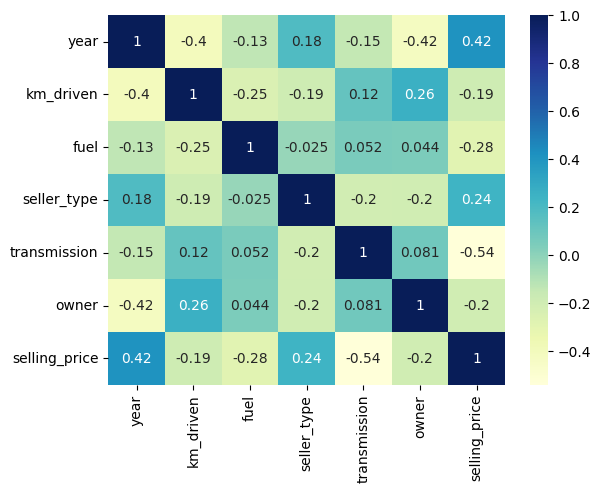

In [235]:
sns.heatmap(combined_data_with_X_train_and_y_train.select_dtypes(include='number').corr(),cmap="YlGnBu",annot=True)

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'km_driven'}>,
        <Axes: title={'center': 'fuel'}>],
       [<Axes: title={'center': 'seller_type'}>,
        <Axes: title={'center': 'transmission'}>,
        <Axes: title={'center': 'owner'}>],
       [<Axes: title={'center': 'selling_price'}>, <Axes: >, <Axes: >]],
      dtype=object)

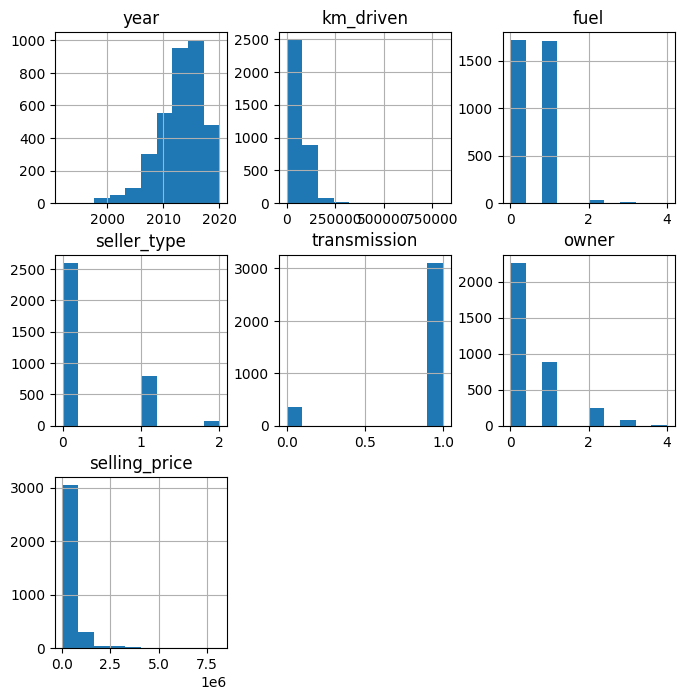

In [236]:
combined_data_with_X_train_and_y_train.hist(figsize=(8,8))

<Axes: xlabel='year', ylabel='km_driven'>

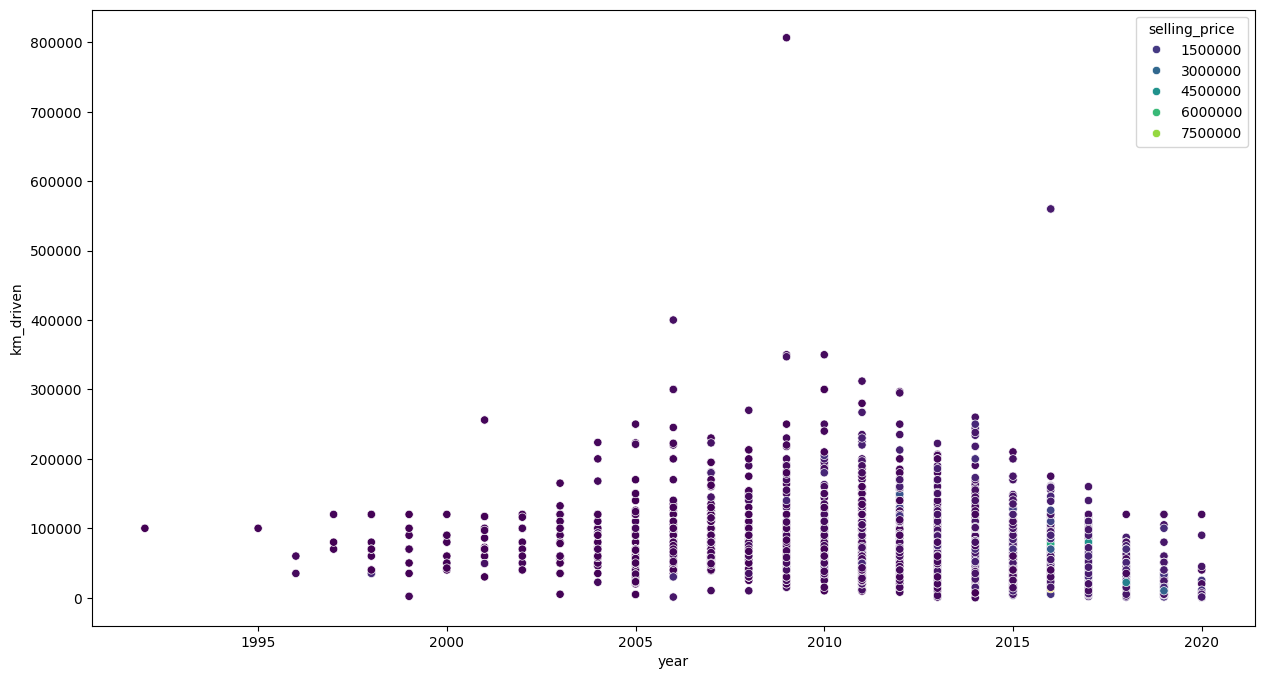

In [237]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='year',y='km_driven',data=df,hue='selling_price',palette="viridis")

# Training and Predicting (inc: Evaluation Metrics and Actual vs Predicted Graph)

# 1. Linear Regression Model

In [238]:
model_lin=LinearRegression()

In [239]:
model_lin.fit(X_train,y_train)

LinearRegression()

In [240]:
y_pred_linear=model_lin.predict(X_test)

In [241]:
# Evaluation Metrics
# Compute metrics
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Print the regression report
print("Regression Report for Linear Regression:")
print(f"R² Score:              {r2_linear:.4f}")
print(f"Mean Absolute Error:   {mae_linear:.4f}")
print(f"Mean Squared Error:    {mse_linear:.4f}")
print(f"Root Mean Squared Error: {rmse_linear:.4f}")

Regression Report for Linear Regression:
R² Score:              0.3982
Mean Absolute Error:   220333.8850
Mean Squared Error:    183644071672.9523
Root Mean Squared Error: 428537.1299


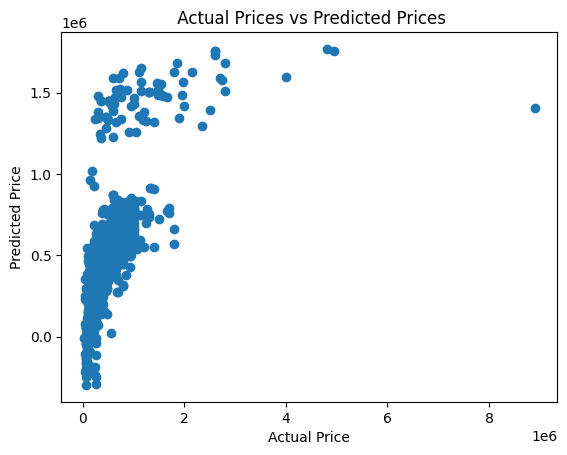

In [242]:
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

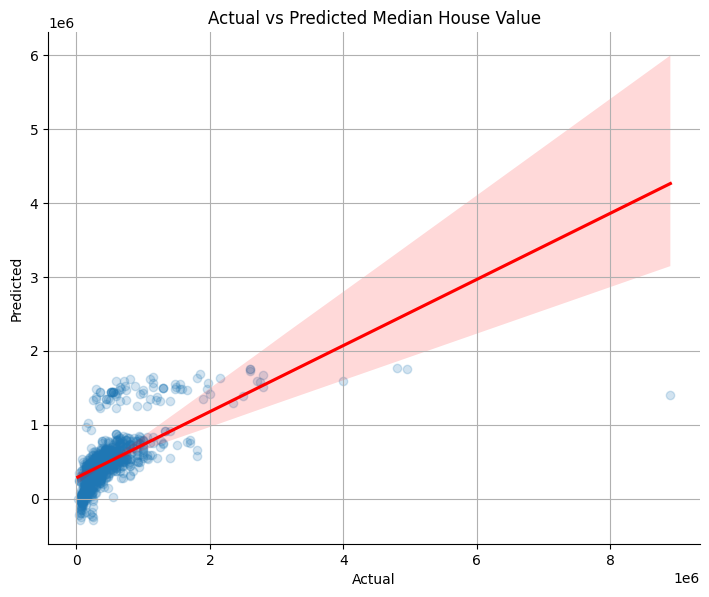

In [243]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_linear
})

# Plot using seaborn's lmplot
sns.lmplot(x='Actual', y='Predicted', data=df, height=6, aspect=1.2, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()


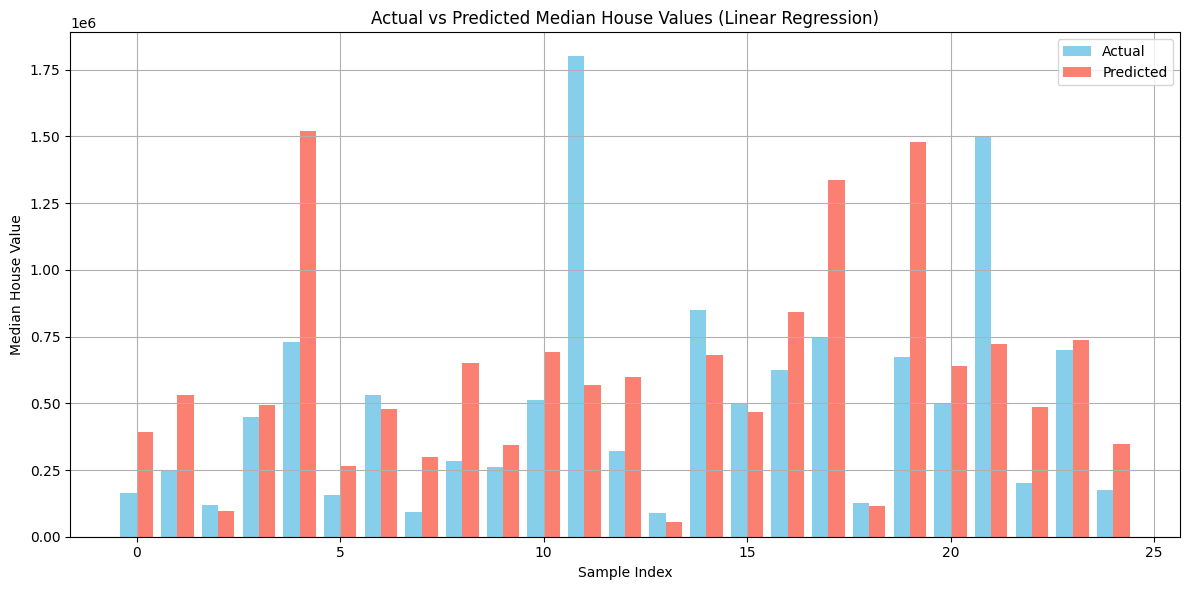

In [244]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_test and y_pred are your actual and predicted values
# Select a subset (e.g., first 25 predictions) for better readability
num_samples = 25
indices = np.arange(num_samples)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(indices - 0.2, y_test[:num_samples], 0.4, label='Actual', color='skyblue')
plt.bar(indices + 0.2, y_pred_linear[:num_samples], 0.4, label='Predicted', color='salmon')

plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
